In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [4]:
seed = 123
train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/rice-image-dataset/Rice_Image_Dataset',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="training",  
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

# Create the validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/rice-image-dataset/Rice_Image_Dataset',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="validation", 
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


In [6]:
import matplotlib.pyplot as plt

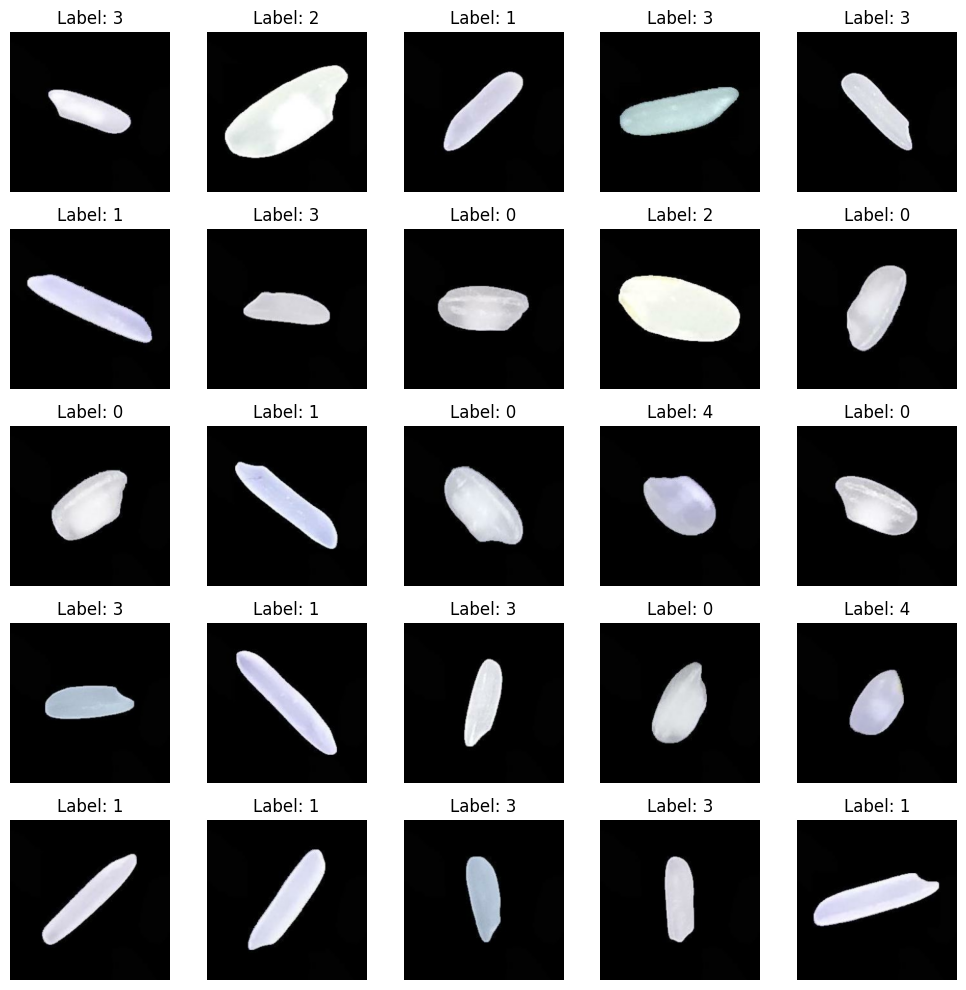

<Figure size 640x480 with 0 Axes>

In [48]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))  # 5 rows, 5 columns

count = 0
for images, labels in train_dataset:
    for i in range(len(images)):
        if count >= 25:
            break
        ax = axes[count // 5, count % 5]  # Get the correct subplot for a 5x5 grid
        ax.imshow(images[i].numpy()[:].astype("uint8"))
        ax.set_title(f"Label: {labels[i].numpy()}")
        ax.axis("off")  # Hide the axis
        
        count += 1
    if count >= 25:
        break

plt.tight_layout()
plt.show()
plt.savefig(f'rice images.png', format='png', dpi=300)

In [8]:
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image,label

In [9]:
train = train_dataset.map(process)
test = validation_dataset.map(process)

In [12]:
print("Training dataset:")
for images, labels in train_dataset.take(1):
    print(images.shape, labels)

print("Validation dataset:")
for images, labels in validation_dataset.take(1):
    print(images.shape, labels)

Training dataset:
(32, 256, 256, 3) tf.Tensor([4 0 1 0 1 1 2 4 1 1 1 4 3 0 1 4 1 1 1 3 4 1 3 1 0 2 3 3 1 3 4 3], shape=(32,), dtype=int32)
Validation dataset:
(32, 256, 256, 3) tf.Tensor([3 3 4 3 4 2 0 2 3 4 0 1 1 0 2 2 0 0 2 4 1 0 4 3 0 2 0 2 4 3 1 2], shape=(32,), dtype=int32)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [22]:

model = Sequential()

# CNN Layers
model.add(Conv2D(256, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu', input_shape=(255,255,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 127, 127, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 63, 63, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 63, 63, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 31, 31, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,149 (1.76 MB)

 Trainable params: 461,253 (1.76 MB)

 Non-trainable params: 896 (3.50 KB)

In [24]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [25]:
history = model.fit(train, epochs = 10, validation_data = test, batch_size = 256)

Epoch 1/10
   2/1875 ━━━━━━━━━━━━━━━━━━━━ 2:46 89ms/step - accuracy: 0.2500 - loss: 1.7127  

I0000 00:00:1735490272.387452     116 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 160s 77ms/step - accuracy: 0.9041 - loss: 0.2528 - val_accuracy: 0.9299 - val_loss: 0.1873
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 69ms/step - accuracy: 0.9851 - loss: 0.0464 - val_accuracy: 0.9931 - val_loss: 0.0208
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 69ms/step - accuracy: 0.9882 - loss: 0.0367 - val_accuracy: 0.9849 - val_loss: 0.0430
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 69ms/step - accuracy: 0.9915 - loss: 0.0278 - val_accuracy: 0.9874 - val_loss: 0.0354
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 69ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9666 - val_loss: 0.1016
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 69ms/step - accuracy: 0.9914 - loss: 0.0270 - val_accuracy: 0.9200 - val_loss: 0.3436
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 128s 69ms/step - accuracy: 0.9929 - loss: 0.0233 - val_accuracy: 0.9759 - val_loss: 0.0739
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 69ms/step - accuracy: 0.9943 - lo

In [41]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)


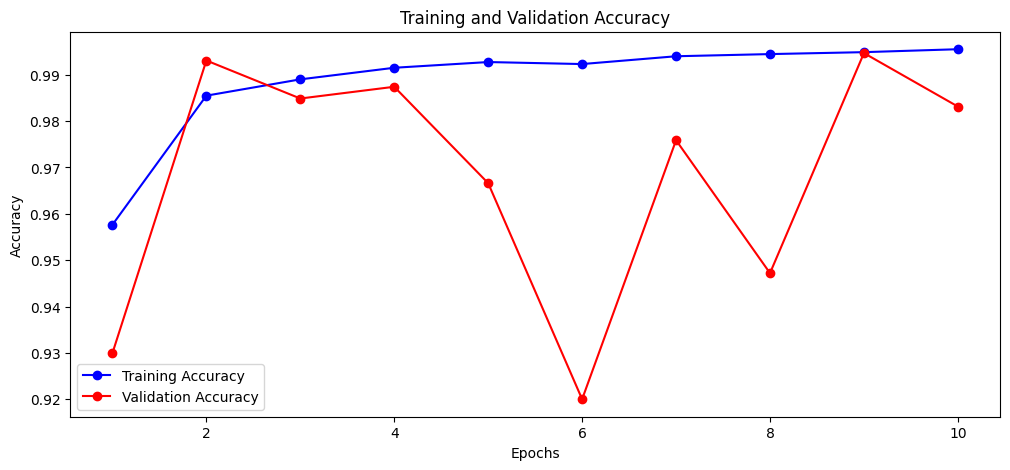

In [45]:

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f'Accuracy.png', format='png', dpi=300)
plt.show()

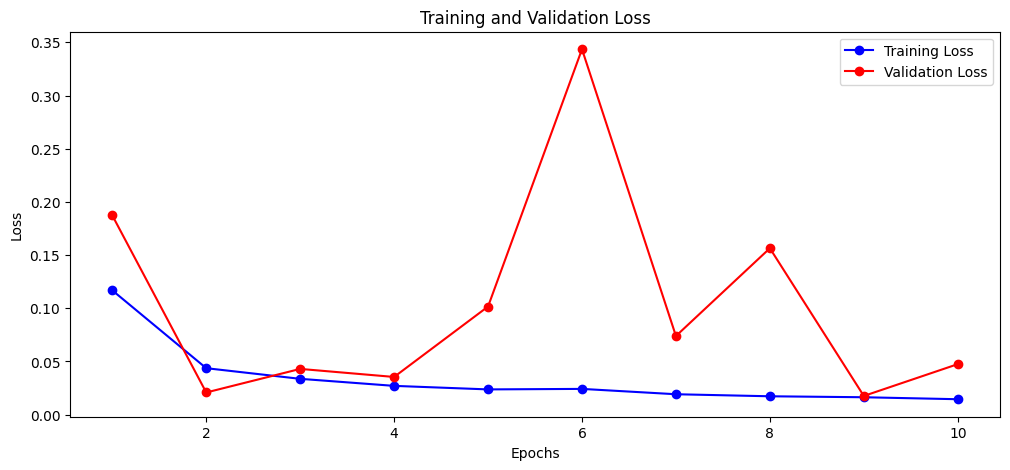

In [46]:

# Plot Loss
plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'loss.png', format='png', dpi=300)

plt.show()


In [49]:
import pandas as pd
from keras.models import load_model
from io import StringIO

# Load your model
model = load_model('rice_classification.h5')

# Function to convert model.summary() to DataFrame
def model_summary_to_dataframe(model):
    # Capture the summary as a string
    stream = StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary_str = stream.getvalue()
    stream.close()

    # Parse the summary string into structured rows
    rows = []
    for line in summary_str.split('\n'):
        if line.strip():  # Skip empty lines
            rows.append(line.split())

    # Convert rows to DataFrame
    df = pd.DataFrame(rows)
    return df

# Save the model summary to a DataFrame
summary_df = model_summary_to_dataframe(model)

# Save the DataFrame to a CSV file (optional)
summary_df.to_csv('model_summary.csv', index=False)

# Print the DataFrame
print(summary_df)

                                                   0                       1   \
0                                              Model:          "sequential_3"   
1   ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━...                    None   
2                                                   ┃                   Layer   
3   ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━...                    None   
4                                                   │               conv2d_12   
5   ├─────────────────────────────────┼───────────...                    None   
6                                                   │        max_pooling2d_11   
7   ├─────────────────────────────────┼───────────...                    None   
8                                                   │  batch_normalization_11   
9                                                   │    (BatchNormalization)   
10  ├─────────────────────────────────┼───────────...                    None   
11                          

In [26]:
model.save("rice_classification.h5")

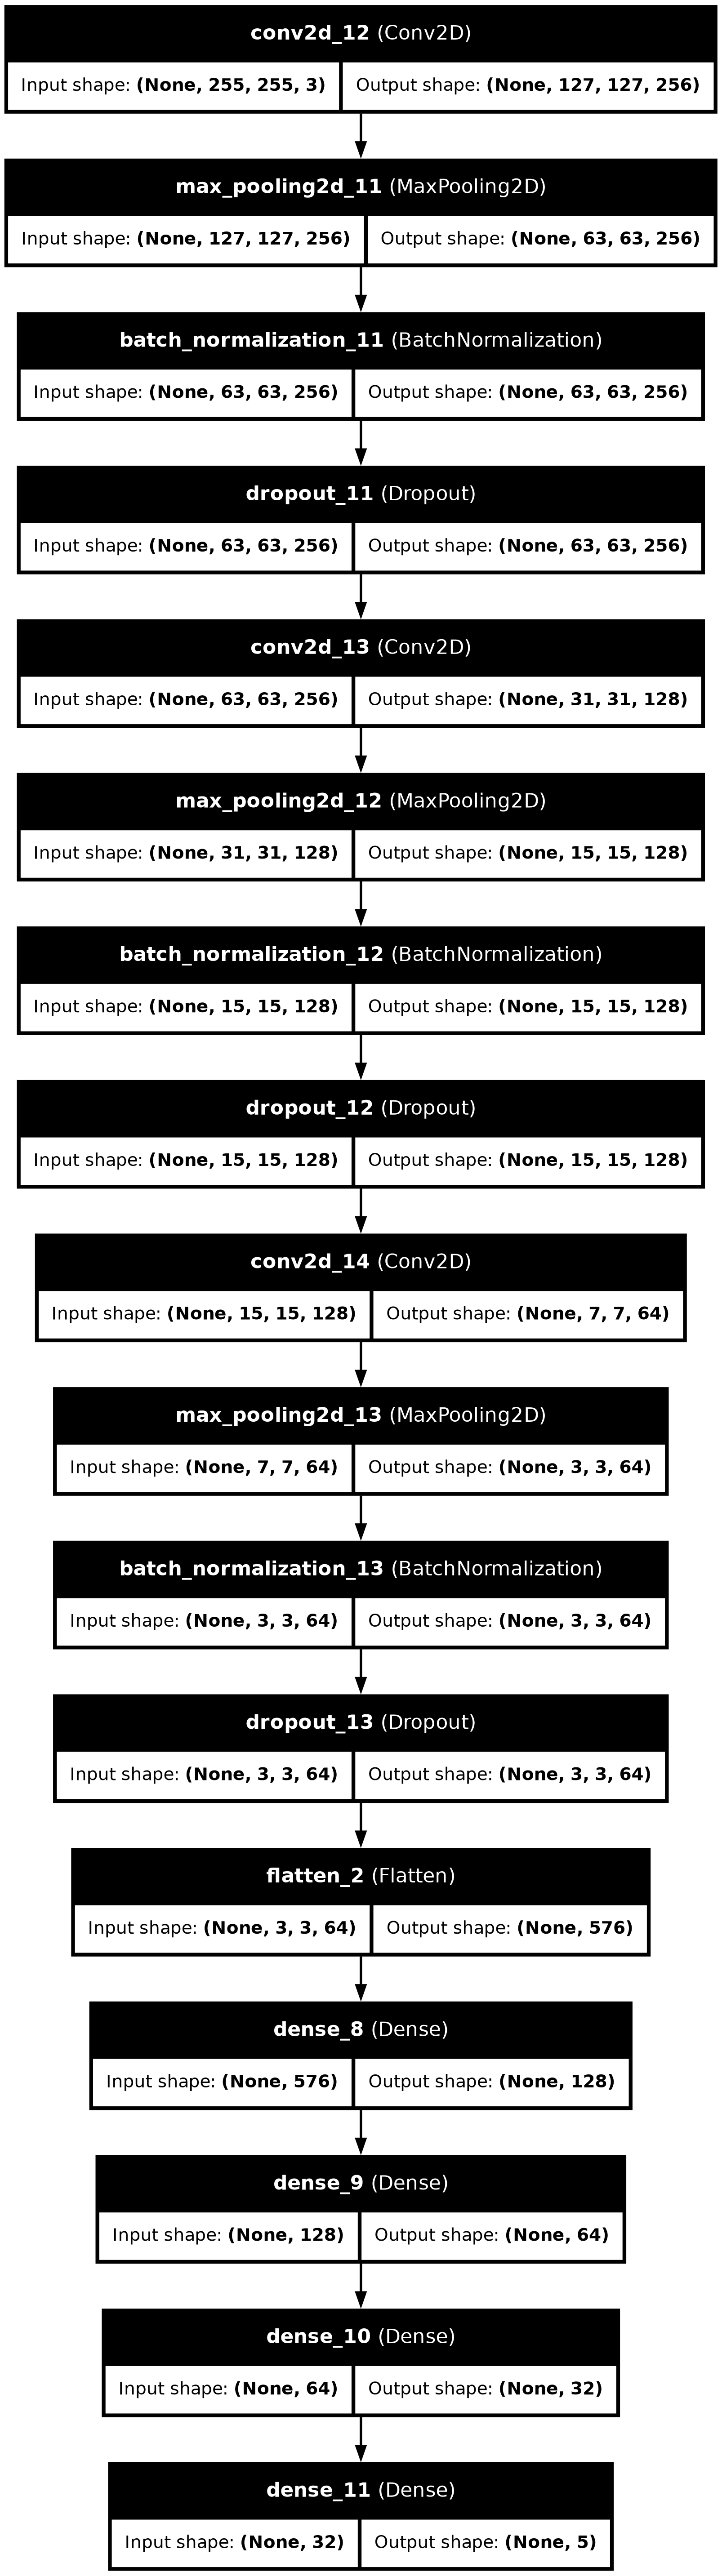

In [30]:
from keras.models import load_model
from keras.utils import plot_model

# Load your CNN model
model = load_model('rice_classification.h5')

# Visualize the model architecture
plot_model(model, to_file='my_cnn_architecture.png', show_shapes=True, show_layer_names=True)
